# Chap 12 手写体数字识别kNN

In [2]:
%cd /data/jupyter/root/ECNU/DataMining/L12-HandwrittenDigit

/data/jupyter/root/ECNU/DataMining/L12-HandwrittenDigit


In [3]:
# from __future__ import divisiona
import os, sys

# 启动绘图
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import codecs
import csv
import warnings
warnings.filterwarnings('ignore')

import operator

In [4]:
def createTrainDataSet():
    train_data_set = np.array([[1, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return train_data_set, labels

train_data_set, labels = createTrainDataSet()

print( train_data_set )
print( labels )

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


## 自己实现kNN

In [5]:
data_set_size = train_data_set.shape[0]
print(data_set_size)
print(train_data_set[0])
np.tile(train_data_set[:], (data_set_size, 1, 1)).tolist() - train_data_set

# np.tile([[1,2,3], [4, 5] ], [2, 3])

4
[1.  1.1]


array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

## debug

In [6]:
new_input = [0.6, 0.3]
data_set = train_data_set
labels = labels
k = 3


data_set_size = data_set.shape[0]
    
diff = np.tile(new_input, (data_set_size, 1)) - data_set
print(diff)
dis = np.sum(diff ** 2, axis = 1) ** 0.5
print(dis)
sortIndex = np.argsort(dis)
print(sortIndex)

[[-0.4 -0.8]
 [-0.4 -0.7]
 [ 0.6  0.3]
 [ 0.6  0.2]]
[0.89442719 0.80622577 0.67082039 0.63245553]
[3 2 1 0]


In [7]:
class_count = {}
for i in range(k):
    voteLabel = labels[sortIndex[i]]
    print(voteLabel)
    print(class_count.get(voteLabel,0))
    class_count[voteLabel] = class_count.get(voteLabel,0) + 1
sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse = True)
sorted_class_count[0][0]

B
0
B
1
A
0


'B'

In [8]:
def kNN_my(new_input, data_set, labels, k):
    data_set_size = data_set.shape[0]
    
    diff = np.tile(new_input, (data_set_size, 1)) - data_set
    dis = np.sum(diff ** 2, axis = 1) ** 0.5
    sortIndex = np.argsort(dis)
    class_count = {}
    for i in range(k):
        voteLabel = labels[sortIndex[i]]
        class_count[voteLabel] = class_count.get(voteLabel,0) + 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse = True)
    return sorted_class_count[0][0]

In [9]:
kNN_my([0.6, 0.3], train_data_set,labels, 3)

'B'

In [10]:
kNN_my([1.2, 0.8], train_data_set,labels, 3)

'A'

## 使用第三方库

In [11]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(train_data_set, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
train_data_set[0].reshape(1, -1)

array([[1. , 1.1]])

In [13]:
kNN.predict(np.array([[0.6, 0.3], [1.2, 0.8]]))

array(['B', 'A'], dtype='<U1')

# 基于kNN的手写体数字识别系统

In [14]:
def img2vect(file_name):
    res = np.zeros((1, 1024))
    fr = open(file_name)
    for i in range(32):
        line = fr.readline()
        for j in range(32):
            res[0, 32*i + j] = int(line[j])
    return res

In [15]:
from os import listdir
train_dir = './data/trainingDigits/'
test_dir = './data/testDigits/'
train_file_list = listdir(train_dir)
test_file_list = listdir(test_dir)
m = len(train_file_list)
n = len(test_file_list)
print(m, n)

1498 434


In [16]:
train_labels = []
train_data = np.zeros((m, 1024))

test_labels = []
test_data = np.zeros((n, 1024))

# train_mat[0] = 1024
# train_mat[2] = np.ones((1, 1024))
# train_mat

In [17]:
for i in range(m):
    file_name = train_file_list[i]
    train_labels.append(int(file_name.split('_')[0]))
    train_data[i,:] = img2vect(os.path.join(train_dir, file_name))

for i in range(n):
    file_name = test_file_list[i]
    test_labels.append(int(file_name.split('_')[0]))
    test_data[i,:] = img2vect(os.path.join(test_dir, file_name))

In [18]:
print(train_labels[0])
print(train_data[0, 0:31])

print(test_labels[0])
print(test_data[0,0:31])

3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [19]:
error_cout = 0
for i in range(n):
    test_predict = kNN_my(test_data[i], train_data, train_labels, 3)
    
#     print("classifier result: %d truth: %d" % (test_predict, test_labels[i]))
    if(test_labels[i] != test_predict):
        error_cout += 1


In [20]:
print(error_cout)
print("error rate: %2.2f%%"%(error_cout/n * 100))
print("right rate: %2.2f%%"%(100-error_cout/n*100))

17
error rate: 3.92%
right rate: 96.08%


# 比较几种分类算法

## kNN

In [21]:
hwLabels
train_mat

NameError: name 'hwLabels' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(train_data, train_labels)

In [ ]:
res = kNN.predict(test_data)
error_cout = 0
for i in range(n):
    if res[i] != test_labels[i]:
        error_cout += 1

In [ ]:
print(n)
print(error_cout)
print("error rate: %2.2f%%"%(error_cout/n * 100))
print("right rate: %2.2f%%"%(100-error_cout/n*100))

## SVM

### linear

In [65]:
from sklearn.svm import SVC
svm_kinear = SVC(C=1.0, kernel='linear')
svm_kinear.fit(train_data, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
res = svm_kinear.predict(test_data)
error_cout = 0
for i in range(n):
    if res[i] != test_labels[i]:
        error_cout += 1
#         print("res:%d truth:%d"%(res[i], test_labels[i]))
#         print(test_file_list[i])

In [67]:
print(n)
print(error_cout)
print("error rate: %2.2f%%"%(error_cout/n * 100))
print("right rate: %2.2f%%"%(100-error_cout/n*100))

434
18
error rate: 4.15%
right rate: 95.85%


### poly

In [71]:
from sklearn.svm import SVC
svm_poly = SVC(C=1.0, kernel='rbf')
svm_poly.fit(train_data, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
res = svm_poly.predict(test_data)
error_cout = 0
for i in range(n):
    if res[i] != test_labels[i]:
        error_cout += 1
#         print("res:%d truth:%d"%(res[i], test_labels[i]))
#         print(test_file_list[i])

In [73]:
print(n)
print(error_cout)
print("error rate: %2.2f%%"%(error_cout/n * 100))
print("right rate: %2.2f%%"%(100-error_cout/n*100))

434
13
error rate: 3.00%
right rate: 97.00%


## 决策树

In [75]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dec_tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
res = dec_tree.predict(test_data)
error_cout = 0
for i in range(n):
    if res[i] != test_labels[i]:
        error_cout += 1
#         print("res:%d truth:%d"%(res[i], test_labels[i]))
#         print(test_file_list[i])

In [ ]:
print(n)
print(error_cout)
print("error rate: %2.2f%%"%(error_cout/n * 100))
print("right rate: %2.2f%%"%(100-error_cout/n*100))

## Sklearn中NB算法(不懂)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

nb1 = GaussianNB()
nb2 = MultinomialNB()
nb3 = BernoulliNB()

nb1.fit(train_data, train_labels)
nb2.fit(train_data, train_labels)
nb3.fit(train_data, train_labels)

In [ ]:
res = nb3.predict(test_data)
error_cout = 0
for i in range(n):
    if res[i] != test_labels[i]:
        error_cout += 1
#         print("res:%d truth:%d"%(res[i], test_labels[i]))
#         print(test_file_list[i])

In [ ]:
print(n)
print(error_cout)
print("error rate: %2.2f%%"%(error_cout/n * 100))
print("right rate: %2.2f%%"%(100-error_cout/n*100))

# 手写测试


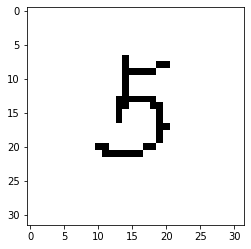

array([[0., 0., 0., ..., 0., 0., 0.]])

In [61]:
import cv2
img = cv2.imread('data/images/hw-5.png', 0)
img = cv2.resize(img, (32,32),None,0,0,cv2.INTER_AREA)
ret, img = cv2.threshold(img,200,255,cv2.THRESH_BINARY) 
plt.imshow(img,cmap='gray')
plt.show()

str = ""
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        str += "0" if img[x, y]>0 else "1"
    str += "\n"


In [62]:
import os
with open('data/images/hw-5.txt', 'w') as f:
    f.write(str)

with open('data/images/hw-5.txt', 'r') as f:
    old = f.read()
#     print(old)
hw_vect = img2vect("data/images/hw-5.txt")
hw_vect

array([[0., 0., 0., ..., 0., 0., 0.]])

In [63]:
kNN_my(hw_vect, train_data, train_labels, 3)

1

In [70]:
svm_kinear.predict(hw_vect)

array([4])

In [74]:
svm_poly.predict(hw_vect)

array([4])

In [76]:
dec_tree.predict(hw_vect)

array([8])